<a href="https://colab.research.google.com/github/massimocipressi/MLPNS_MCipressi/blob/main/clustering/happiness_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 2 Assignment 2:

Following the work we did together on the youtube videos and movies datasets, explore this dataset of "world happiness". 
This is a free form assignment: all the tasks have been performed in the _youtube videos_ or _movies_ data exploration we did in class (see class lectures and associated notebooks, also see Assignment 1 in HW 2). 

Find the datast happines.csv in 
https://github.com/fedhere/FDSfE_FBianco


On your own, perform the following tasks and report the results (with neat print statemnets as done in https://github.com/fedhere/FDSfE_FBianco/blob/main/HW2/movies_exploratory_instructions.ipynb, and remember that _all_ figures need axis labels and figure captions). 

- find the shape of the dataframe
- show the top _10 rows_ and bottom _10 rows_ of the dataframe (_done in the videos and movies exploration_)
- find statistical properties of the numerical columns of the dataframe (mean, standard deviation, quantiles etc)  (_done in the videos and movies exploration_) 
- inspect if the dataframe has missing values (_done in the movies exploration_). If it does have any decide how to deal with them: you can remove the rows or columns with missing values (with _drop_ or _dropna_ as we did in the movies assignment, but make sure you do not need them to answer the following questions before you drop them!), or replace them with some value that you thin is appropriate, for example with with _fillna_, see instructions on this function [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)). The choice of how to deal with missing values is yours, but you do have to end up with a dataframe with no missing values (make sure you show that the resulting dataframe has no missing values either with a printed output or with a plot).
- find the happiest country. 
- is the happiest country also the top country in any of the following variables: [Economy (GDP per Capita),	Family	Health, (Life Expectancy),	Freedom	Trust (Government Corruption),Generosity	Dystopia Residual]

- find the happiness score for a country of your choice, for example your country of origin, or any country you like. We did not do this exact task in either notebook _but_ to do that you can use a condition like `df["Happiness Score"] == "mycountry"` - this is similar to what you did to get the maximum value for a country: `df["Happiness Score"] == df["Happiness Score"].max()` and then use this statement as an index for the dataframe). 

- find the top 10 happiest coutries (using the `sort_values` function like we did in class for the videos analysis - _done in the videos and movies exploration_)
- measure the correlation among (numerical) variables (_done in the videos and movies exploration_)
- show a plot of the correlation of (numerical) variables (we did it in a couple of different ways in the youtube videos notebook) and describe it in a caption - what do you see? any noticeable correlations or anticorrelations? (_done in the videos and movies exploration_)
- aggregate the countries by region with `_group_by()` (_done in the videos and movies exploration_) and find the region with the highest "Generosity")

REMEMBER: 
- for each plot make a caption that states "what" and "why" (see HW2 assignment 1) and make sure the plots have appropriate axis labels. 
- for every "finding" make sure the result is clear, for example by clearly extracting it in a print statement or by writing a text cell below the core that shows the result
- save your notebook on Github in your FDSfE repository as HW1_happiness.ipynb


In [1]:
import pandas as pd
import seaborn as sns

In [2]:
happiness15 = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSfE_FBianco/main/data/happines.csv")


- find the shape of the dataframe

In [3]:
print("the shape of the dataframe is", happiness15.shape)

the shape of the dataframe is (160, 12)



- show the top _10 rows_ and bottom _10 rows_ of the dataframe (_done in the videos and movies exploration_)


In [4]:
happiness15.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [5]:
happiness15.tail()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015
157,Togo,Sub-Saharan Africa,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2015
158,Namibia,NaN,4.639,NaN,0.87900,NaN,0.47700,0.40100,0.05600,0.07000,NaN,2019
159,Gambia,NaN,4.516,NaN,0.30800,NaN,0.42800,0.38200,0.16700,0.26900,NaN,2019


- find statistical properties of the numerical columns of the dataframe (mean, standard deviation, quantiles etc)  (_done in the videos and movies exploration_) 

In [6]:
happiness15.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
count,160.000000,158.000000,160.000000,158.000000,160.000000,160.000000,160.000000,160.000000,158.000000,160.000000
mean,5.365756,0.047885,0.842979,0.991046,0.628037,0.428151,0.143023,0.236448,2.098977,2015.050000
std,1.141280,0.017146,0.402840,0.272369,0.246332,0.149803,0.119492,0.126605,0.553550,0.445805
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2015.000000
25%,4.517750,0.037268,0.539453,0.856823,0.437897,0.328630,0.061067,0.148800,1.759410,2015.000000
50%,5.203000,0.043940,0.901085,1.029510,0.695745,0.434635,0.107220,0.216130,2.095415,2015.000000
75%,6.193250,0.052300,1.155523,1.214405,0.809837,0.547057,0.179565,0.307547,2.462415,2015.000000
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,2019.000000


(0.0, 4.0)

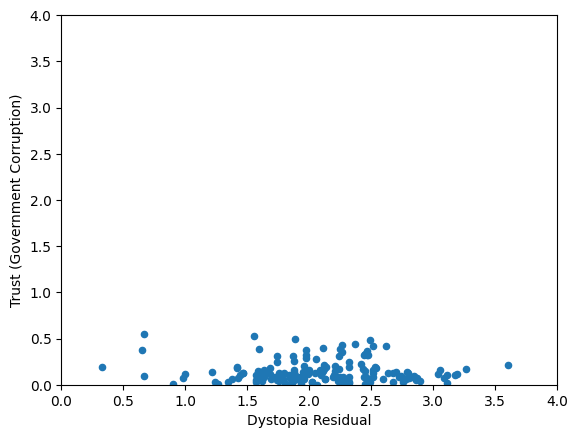

In [7]:
ax = happiness15.plot(x="Dystopia Residual", 
                      y="Trust (Government Corruption)", kind='scatter')
ax.set_xlim(0,4)
ax.set_ylim(0,4)



In [8]:
happiness15[happiness15["Trust (Government Corruption)"] == 
            happiness15["Trust (Government Corruption)"].max()][
                ["Country", "Trust (Government Corruption)"]],\
happiness15[happiness15["Trust (Government Corruption)"] == 
            happiness15["Trust (Government Corruption)"].min()][
                ["Country", "Trust (Government Corruption)"]]



(    Country  Trust (Government Corruption)
 153  Rwanda                        0.55191,
       Country  Trust (Government Corruption)
 73  Indonesia                            0.0)

In [9]:
happiness15[happiness15["Dystopia Residual"] == 
            happiness15["Dystopia Residual"].max()][
                ["Country", "Dystopia Residual"]],\
happiness15[happiness15["Dystopia Residual"] == 
            happiness15["Dystopia Residual"].min()][
                ["Country", "Dystopia Residual"]]


(   Country  Dystopia Residual
 13  Mexico            3.60214,
     Country  Dystopia Residual
 155   Syria            0.32858)

In [10]:
from sklearn import cluster
model = cluster.KMeans(n_clusters=3)
model.fit(happiness15[["Trust (Government Corruption)", "Dystopia Residual"]])


ValueError: ignored


- inspect if the dataframe has missing values (_done in the movies exploration_). If it does have any decide how to deal with them: you can remove the rows or columns with missing values (with _drop_ or _dropna_ as we did in the movies assignment, but make sure you do not need them to answer the following questions before you drop them!), or replace them with some value that you thin is appropriate, for example with with _fillna_, see instructions on this function [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)). The choice of how to deal with missing values is yours, but you do have to end up with a dataframe with no missing values (make sure you show that the resulting dataframe has no missing values either with a printed output or with a plot).


In [ ]:
import missingno as msno
msno.matrix(happiness15);

In [ ]:
happiness15.info()

In [ ]:
print("number of missinv values per column")
happiness15.isna().sum()

# DROP MISSING VARIABLES (by row)

In [11]:
shape_old = happiness15.shape
happiness15.dropna(axis=0, how="any", inplace=True)
print("we lost {}% of the observations by dropping each row with NaN's".format(
    ((shape_old[0] - happiness15.shape[0]) / shape_old[0]) * 100))

we lost 1.25% of the observations by dropping each row with NaN's


In [12]:
from sklearn import cluster
model = cluster.KMeans(n_clusters=3, random_state=302)
model.fit(happiness15[["Trust (Government Corruption)", "Dystopia Residual"]])


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=302)

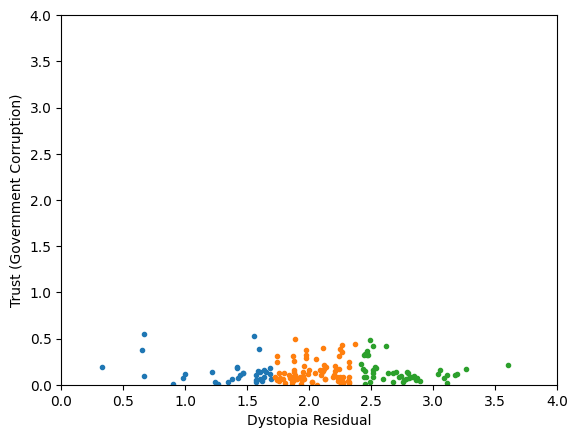

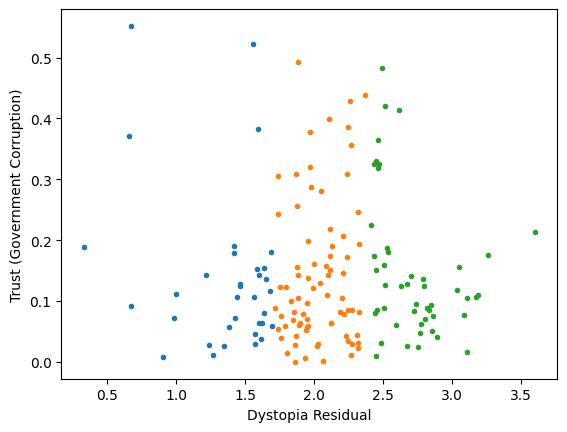

In [13]:
import pylab as pl
pl.plot(happiness15["Dystopia Residual"][model.labels_==0], 
        happiness15["Trust (Government Corruption)"][model.labels_==0], '.', )
pl.plot(happiness15["Dystopia Residual"][model.labels_==1], 
        happiness15["Trust (Government Corruption)"][model.labels_==1], '.', )
pl.plot(happiness15["Dystopia Residual"][model.labels_==2], 
        happiness15["Trust (Government Corruption)"][model.labels_==2], '.', )
pl.xlim(0,4)
pl.ylim(0,4);
pl.xlabel("Dystopia Residual")
pl.ylabel("Trust (Government Corruption)");

pl.figure()
pl.plot(happiness15["Dystopia Residual"][model.labels_==0], 
        happiness15["Trust (Government Corruption)"][model.labels_==0], '.', )
pl.plot(happiness15["Dystopia Residual"][model.labels_==1], 
        happiness15["Trust (Government Corruption)"][model.labels_==1], '.', )
pl.plot(happiness15["Dystopia Residual"][model.labels_==2], 
        happiness15["Trust (Government Corruption)"][model.labels_==2], '.', )

pl.xlabel("Dystopia Residual")
pl.ylabel("Trust (Government Corruption)");

## if we want all features to matter the same we scale the features

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


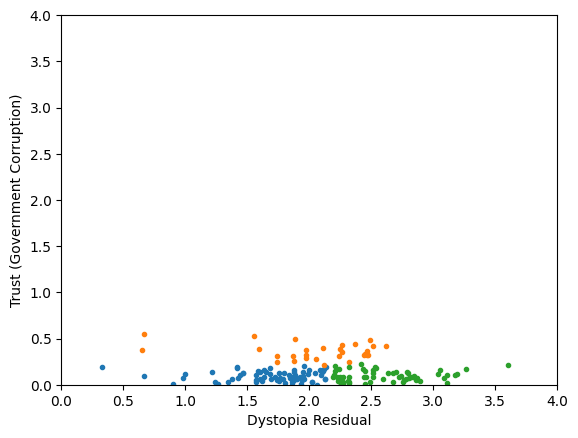

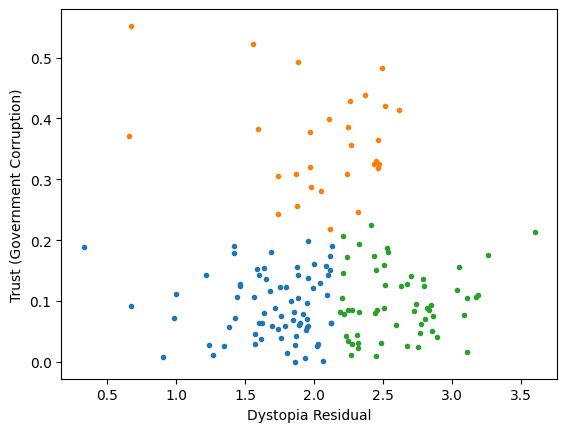

In [14]:
from sklearn import preprocessing
X = preprocessing.scale(happiness15[
    ["Trust (Government Corruption)", "Dystopia Residual"]], axis=0)

model = cluster.KMeans(n_clusters=3, random_state=302)
model.fit(X)

pl.plot(happiness15["Dystopia Residual"][model.labels_==0], 
        happiness15["Trust (Government Corruption)"][model.labels_==0], '.', )
pl.plot(happiness15["Dystopia Residual"][model.labels_==1], 
        happiness15["Trust (Government Corruption)"][model.labels_==1], '.', )
pl.plot(happiness15["Dystopia Residual"][model.labels_==2], 
        happiness15["Trust (Government Corruption)"][model.labels_==2], '.', )
pl.xlim(0,4)
pl.ylim(0,4);
pl.xlabel("Dystopia Residual")
pl.ylabel("Trust (Government Corruption)");

pl.figure()
pl.plot(happiness15["Dystopia Residual"][model.labels_==0], 
        happiness15["Trust (Government Corruption)"][model.labels_==0], '.', )
pl.plot(happiness15["Dystopia Residual"][model.labels_==1], 
        happiness15["Trust (Government Corruption)"][model.labels_==1], '.', )
pl.plot(happiness15["Dystopia Residual"][model.labels_==2], 
        happiness15["Trust (Government Corruption)"][model.labels_==2], '.', )

pl.xlabel("Dystopia Residual")
pl.ylabel("Trust (Government Corruption)");

## Additional Things you may want to do

- find the happiest country. 

In [ ]:
happiest = happiness15[happiness15["Happiness Score"] == happiness15["Happiness Score"].max()]
print("The happiest country is", happiest["Country"].values[0])
print("The highest happiness score is", happiness15[happiness15["Happiness Score"] == 
                                             happiness15["Happiness Score"].max()]["Happiness Score"].values[0])


- is the happiest country also the top country in any of the following variables: [Economy (GDP per Capita),	Family	Health, (Life Expectancy),	Freedom	Trust (Government Corruption),Generosity	Dystopia Residual]


In [ ]:
print(happiness15.max())

In [ ]:
happiness15.columns

In [ ]:
for c in ['Happiness Score', 
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual']:
  if happiest[c].values[0] < happiness15[c].max():
    print(happiest["Country"].values[0], "is not the top country in", 
          c)
  else:
    print(happiest["Country"].values[0], "is the top country in", c)


find the happiness score for a country of your choice, for example your country of origin, or any country you like. We did not do this exact task in either notebook but to do that you can use a condition like df["Happiness Score"] == "mycountry" - this is similar to what you did to get the maximum value for a country: df["Happiness Score"] == df["Happiness Score"].max() and then use this statement as an index for the dataframe).



In [ ]:
happiness15[happiness15.Country == "Italy"]["Happiness Score"]

In [ ]:
print("Italy is {:.1f} standard deviations above the mean happiness".format(
    ((happiness15[happiness15.Country == "Italy"]["Happiness Score"] - 
  happiness15["Happiness Score"].mean()) / happiness15["Happiness Score"].std()).values[0]))

find the top 10 happiest coutries (using the sort_values function like we did in class for the videos analysis - done in the videos and movies exploration)


In [ ]:
print("top 10 happiest countries")
happiness15.sort_values(by="Happiness Score", ascending=False)[:10]


measure the correlation among (numerical) variables (done in the videos and movies exploration)


In [15]:
print('Correlationo of numerical variables related to "happiness"')
happiness15.corr()

Correlationo of numerical variables related to "happiness"


<ipython-input-15-861d4c5cba45>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  happiness15.corr()


,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,NaN
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,NaN
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,NaN
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,NaN
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,NaN
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,NaN
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,NaN
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,NaN
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sns.pairplot(happiness15);
#esiste anche in pandas ma questo è più bello
#sulla diagonale vedo la distribuzione delle variabili
#fuori diagonale posso vedere le correlazioni
#se trovo due variabili correlate posso eliminarne una oppure semplicemente tenerne conto
#ad esempio quando faccio feature importance questa sarà sottovalutata per ciascuna

Figure 1

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covaria

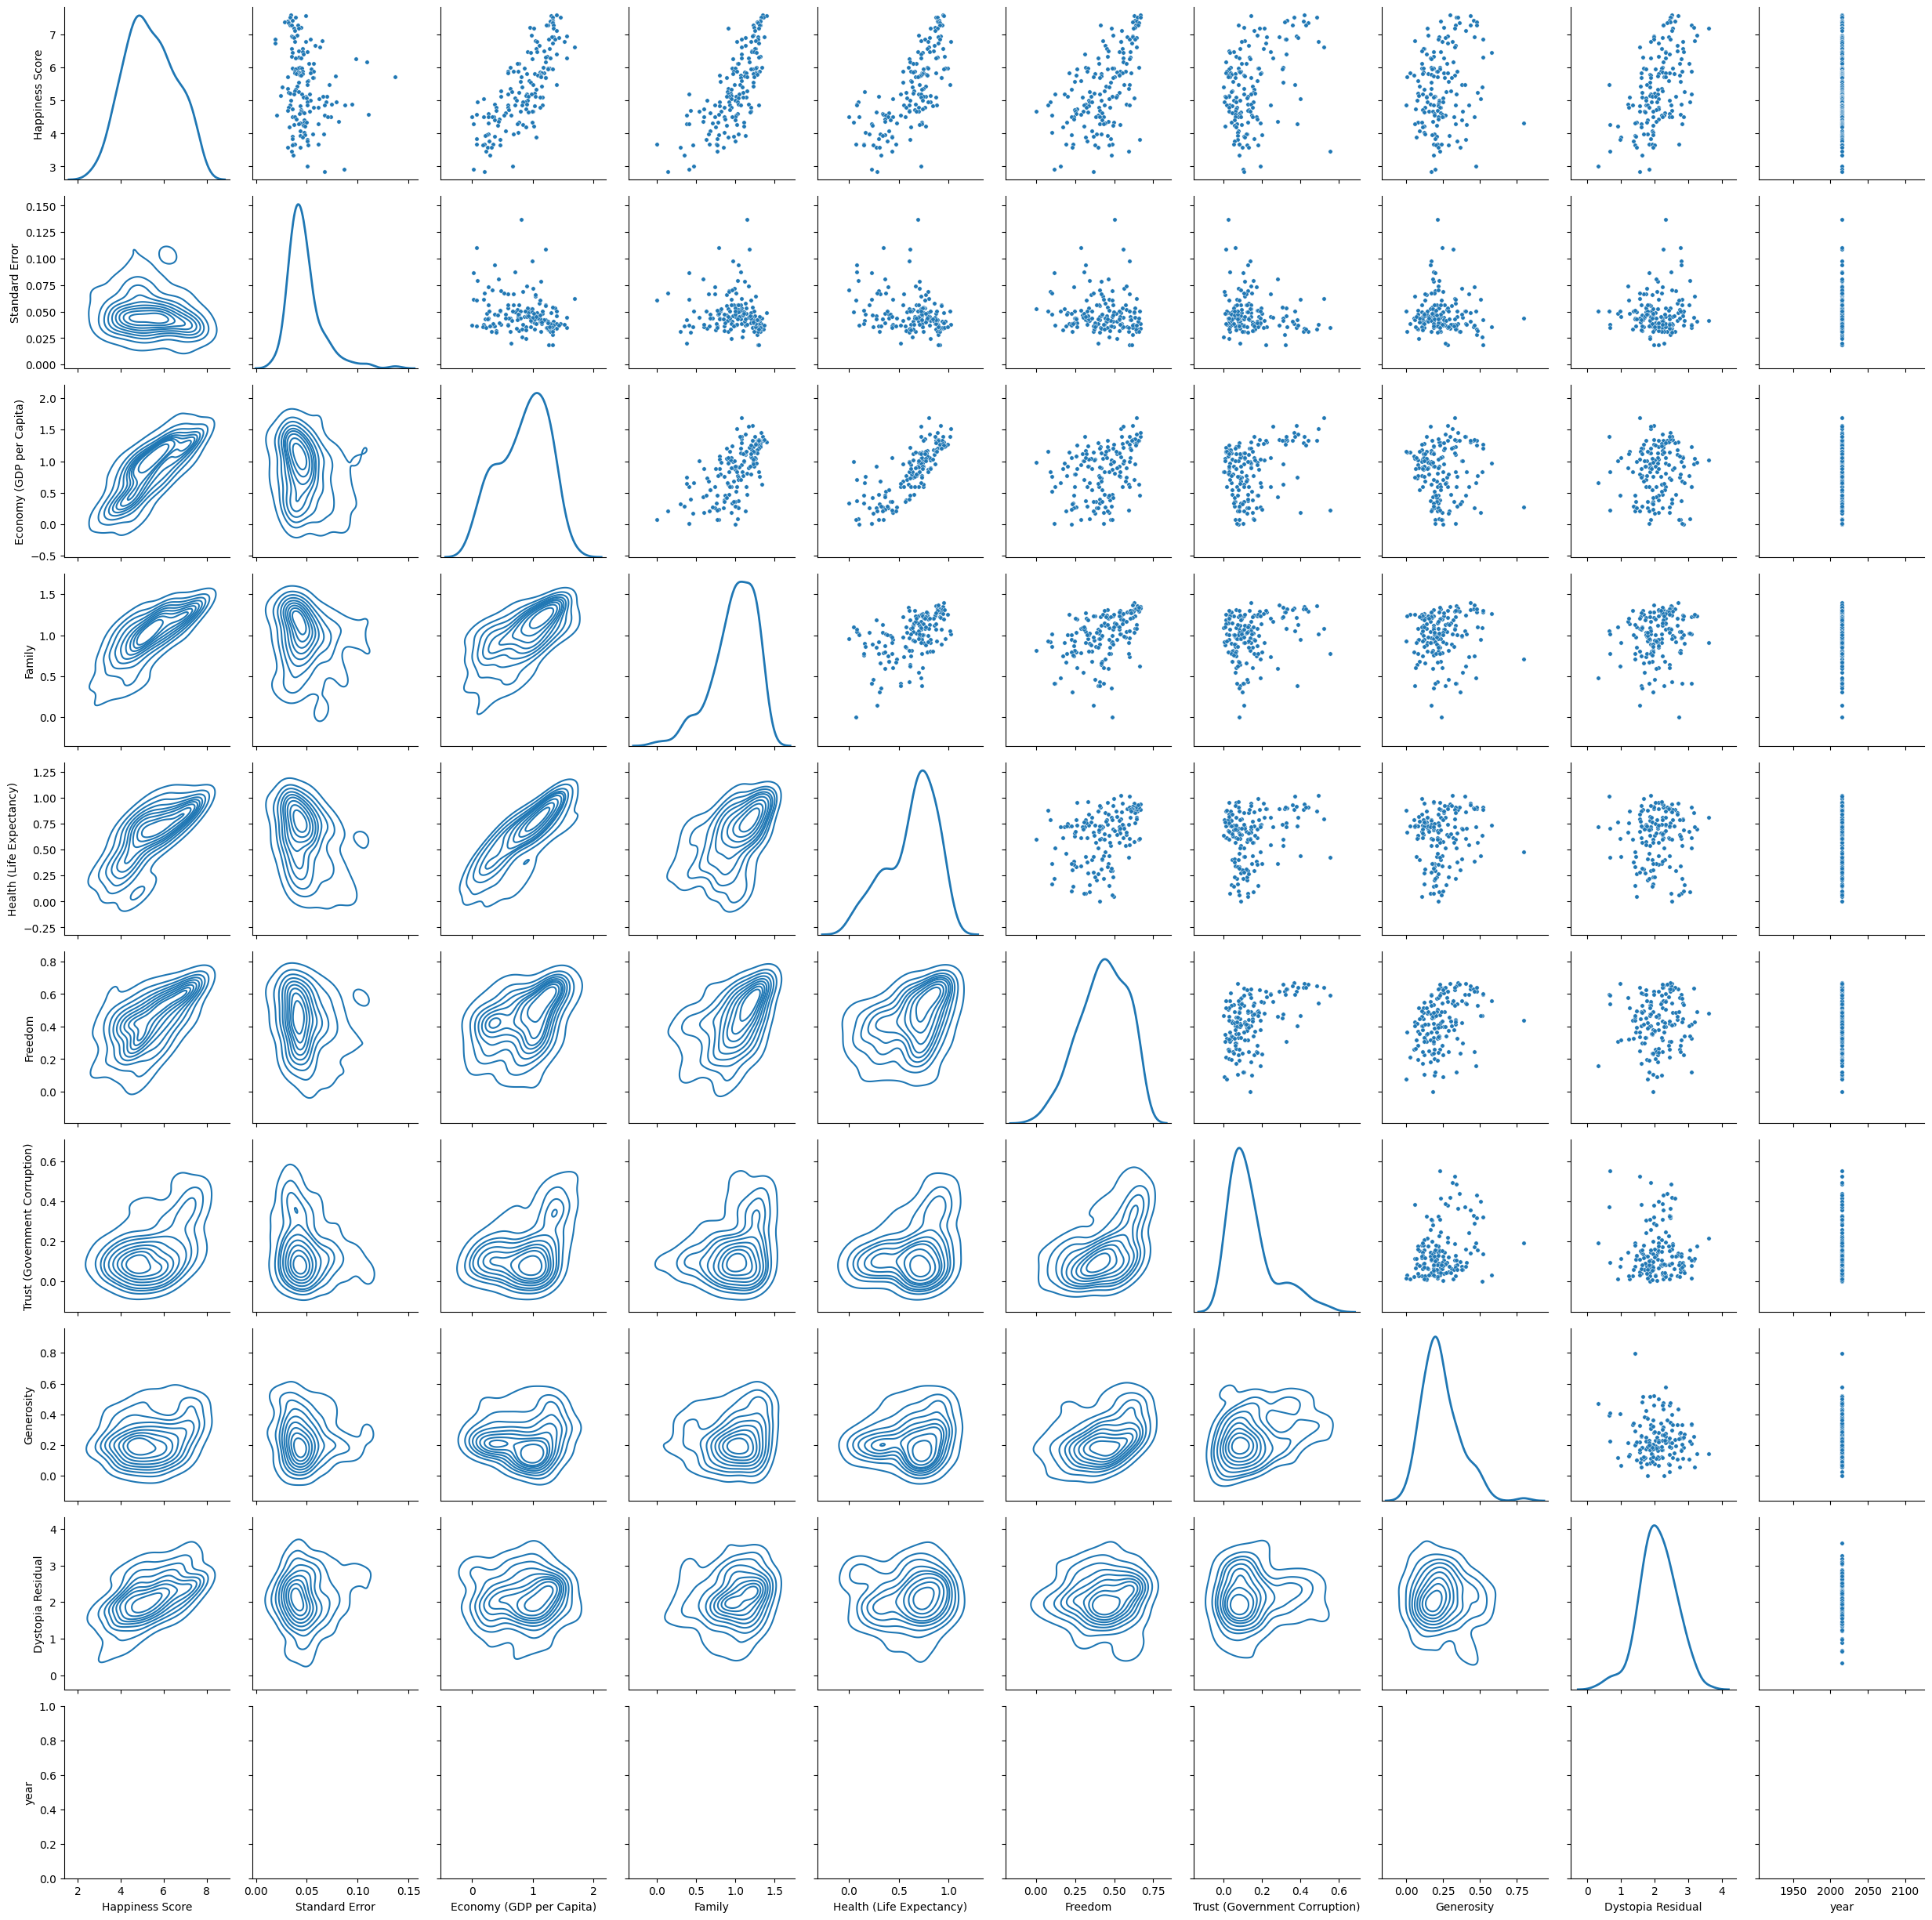

In [18]:
#posso anche fare cose un po' diverse
g = sns.PairGrid(happiness15, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot) #kde è un algoritmo di interpolazione
g.map_diag(sns.kdeplot,lw=2) #un contour può dare più intuizione

- aggregate the countries by region with `_group_by()` (_done in the videos and movies exploration_) and find the region with the highest "Generosity")

In [ ]:
print("The happiest region is")
happiness15.groupby("Region").mean().sort_values(by=["Generosity"],
                                                 ascending=False)[:1]

In [ ]:
from scipy import stats
stats.ks_2samp(happiness15["Happiness Score"], happiness15["Generosity"])

In [ ]:
stats.ks_2samp(happiness15["Generosity"], happiness15["Generosity"])